Course: INF2178

Assignment: Assignment 3

Name: Ruiying Wang

Student number: 1003059762


In [1]:
%pip install pingouin
%pip install dfply

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 3.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from pingouin import ancova
import matplotlib.pyplot as plt
from dfply import *
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


In [3]:
df = pd.read_csv('INF2178_A3_data.csv')
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


**Exploratary Data Analysis**

In [5]:
# summary statistics for each column by Income group.
summary = df.groupby('incomegroup').describe()

for column in summary.columns.levels[0]:
    print(f"Summary for column: {column}")
    display(summary[column].round(2))
    print("\n")

Summary for column: fallreadingscore


,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,32.79,8.09,21.01,27.10,31.66,36.05,118.29
2,3726.0,36.29,9.99,22.19,30.27,34.53,40.00,138.51
3,3478.0,39.90,12.29,23.01,32.78,37.58,44.23,133.56




Summary for column: fallmathscore


,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,23.92,7.64,10.51,18.61,22.79,27.57,86.33
2,3726.0,27.57,8.54,11.59,21.52,26.14,31.78,83.42
3,3478.0,31.01,9.93,10.90,24.37,29.08,35.67,115.65




Summary for column: fallgeneralknowledgescore


,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,19.95,6.72,6.98,14.84,19.30,24.64,43.51
2,3726.0,23.89,6.87,7.12,18.81,23.87,28.59,46.12
3,3478.0,26.45,7.10,7.50,21.61,26.51,31.37,47.69




Summary for column: springreadingscore


,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,43.67,12.00,22.35,36.10,41.97,48.53,142.49
2,3726.0,48.01,13.51,23.93,39.87,46.06,52.17,142.49
3,3478.0,52.21,16.45,24.54,42.78,48.74,56.24,156.85




Summary for column: springmathscore


,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,33.88,10.73,11.90,26.41,32.27,40.10,105.06
2,3726.0,38.46,11.36,13.14,30.39,37.03,44.70,110.33
3,3478.0,42.41,12.61,12.70,33.84,41.03,48.46,113.80




Summary for column: springgeneralknowledgescore


,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,25.07,7.25,8.12,19.71,25.06,30.16,45.58
2,3726.0,29.14,6.97,7.86,24.50,29.48,34.12,48.06
3,3478.0,31.57,6.93,9.51,27.12,32.08,36.63,48.34




Summary for column: totalhouseholdincome


,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,22019.72,10053.06,1.0,14000.0,23000.0,30000.0,39800.0
2,3726.0,51742.76,8191.55,40000.0,45000.0,50000.0,60000.0,69700.0
3,3478.0,100989.76,28154.39,70000.0,80000.0,90000.0,120000.0,150000.0




Summary for column: incomeinthousands


,count,mean,std,min,25%,50%,75%,max
incomegroup,,,,,,,,
1,4729.0,22.02,10.05,0.0,14.0,23.0,30.0,39.8
2,3726.0,51.74,8.19,40.0,45.0,50.0,60.0,69.7
3,3478.0,100.99,28.15,70.0,80.0,90.0,120.0,150.0


**Exploratary Data Analysis**

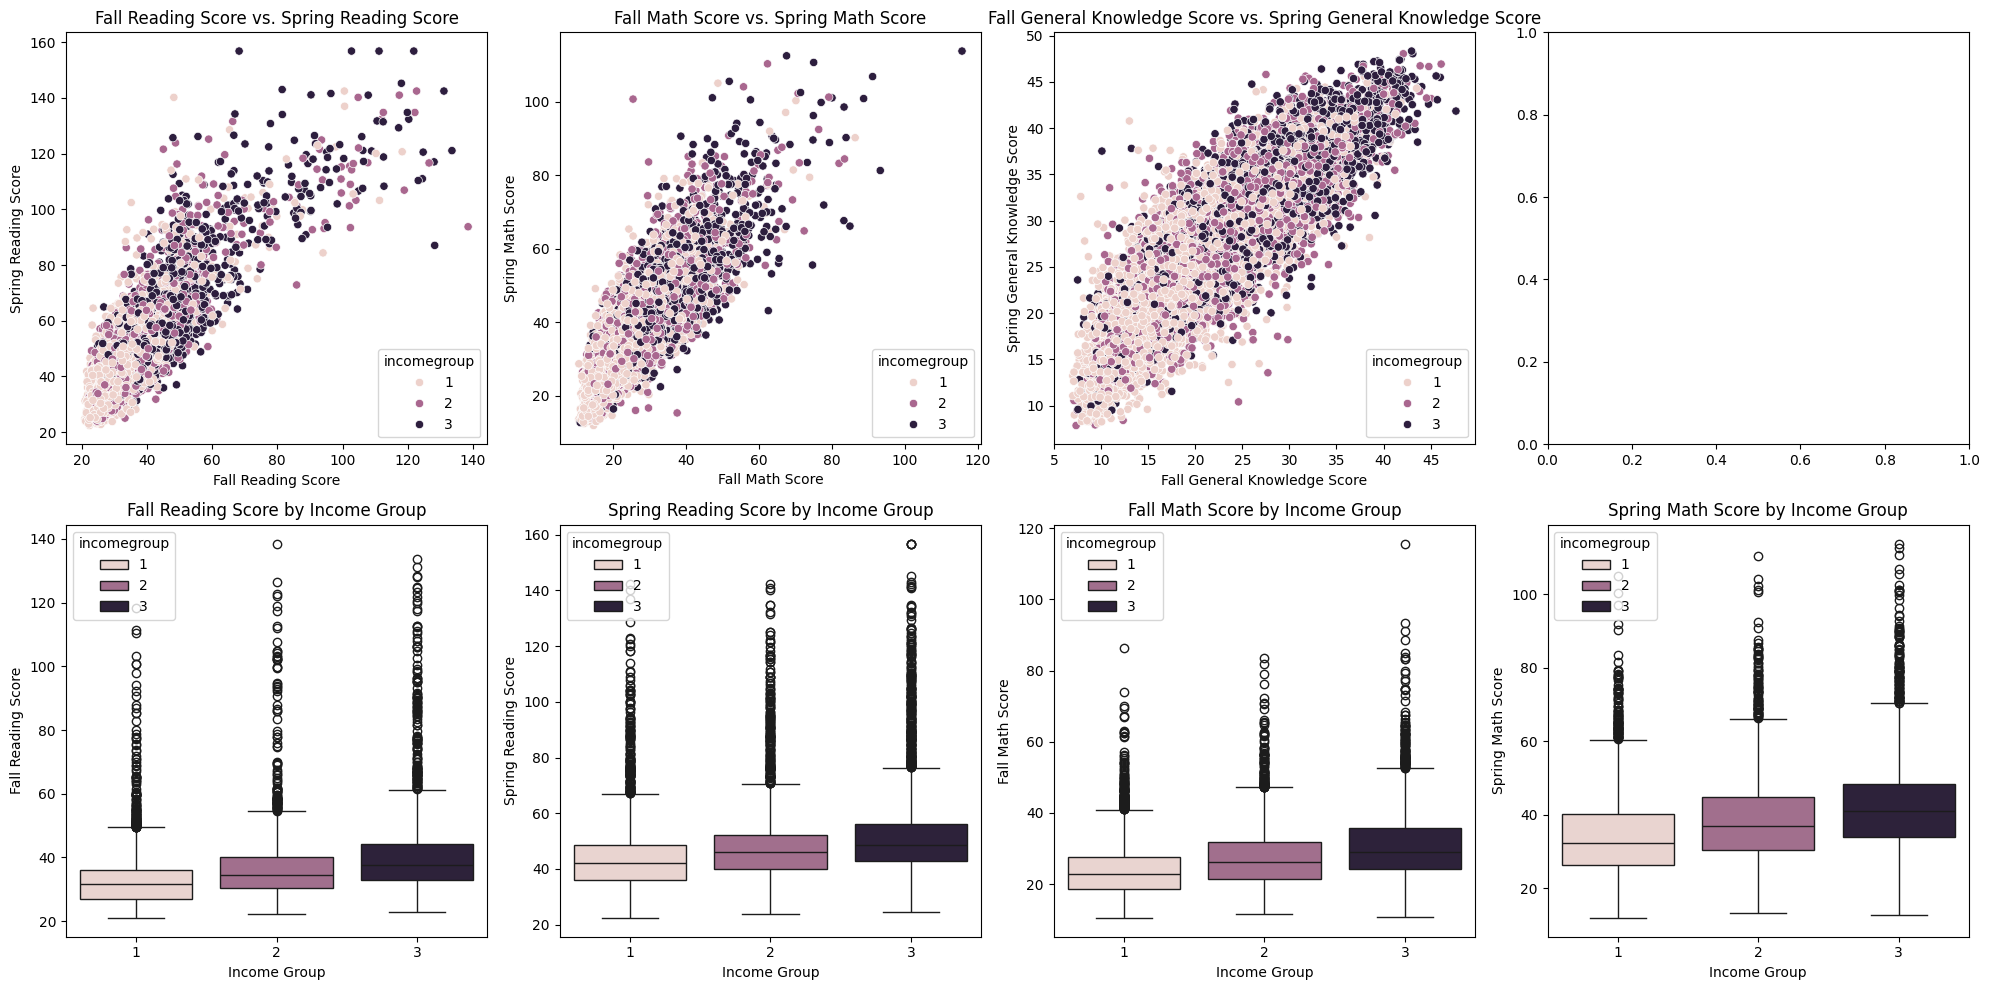

In [6]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Scatterplot for Fall Reading Score vs Spring Reading Score
sns.scatterplot(data=df, x="fallreadingscore", y="springreadingscore", hue='incomegroup', ax=axs[0, 0])
axs[0, 0].set_title('Fall Reading Score vs. Spring Reading Score')
axs[0, 0].set_xlabel('Fall Reading Score')
axs[0, 0].set_ylabel('Spring Reading Score')

# Scatterplot for Fall Math Score vs Spring Math score
sns.scatterplot(data=df, x="fallmathscore", y="springmathscore", hue='incomegroup', ax=axs[0, 1])
axs[0, 1].set_title('Fall Math Score vs. Spring Math Score')
axs[0, 1].set_xlabel('Fall Math Score')
axs[0, 1].set_ylabel('Spring Math Score')

# Scatterplot for Fall General Knowledge Score vs Spring General Knowledge score
sns.scatterplot(data=df, x="fallgeneralknowledgescore", y="springgeneralknowledgescore", hue='incomegroup', ax=axs[0, 2])
axs[0, 2].set_title('Fall General Knowledge Score vs. Spring General Knowledge Score')
axs[0, 2].set_xlabel('Fall General Knowledge Score')
axs[0, 2].set_ylabel('Spring General Knowledge Score')

# Boxplot for Fall Reading Score by Income Group
sns.boxplot(data=df, x="incomegroup", y="fallreadingscore", hue='incomegroup', ax=axs[1, 0])
axs[1, 0].set_title('Fall Reading Score by Income Group')
axs[1, 0].set_xlabel('Income Group')
axs[1, 0].set_ylabel('Fall Reading Score')

# Boxplot for Spring Reading Score by Income Group
sns.boxplot(data=df, x="incomegroup", y="springreadingscore", hue='incomegroup', ax=axs[1, 1])
axs[1, 1].set_title('Spring Reading Score by Income Group')
axs[1, 1].set_xlabel('Income Group')
axs[1, 1].set_ylabel('Spring Reading Score')

# Boxplot for Fall Math Score by Income Group
sns.boxplot(data=df, x="incomegroup", y="fallmathscore", hue='incomegroup', ax=axs[1, 2])
axs[1, 2].set_title('Fall Math Score by Income Group')
axs[1, 2].set_xlabel('Income Group')
axs[1, 2].set_ylabel('Fall Math Score')

# Boxplot for Spring Math Score by Income Group
sns.boxplot(data=df, x="incomegroup", y="springmathscore", hue='incomegroup', ax=axs[1, 3])
axs[1, 3].set_title('Spring Math Score by Income Group')
axs[1, 3].set_xlabel('Income Group')
axs[1, 3].set_ylabel('Spring Math Score')

plt.tight_layout()
plt.show()


**ANCOVA**

In [22]:
from statsmodels.formula.api import ols

# ANCOVA for reading / math scores with fall general knowledge as a covariate
ancova_reading = sm.formula.ols('springreadingscore ~ fallreadingscore + fallgeneralknowledgescore + C(incomegroup)' , data=df).fit()
ancova_math = sm.formula.ols('springmathscore ~ fallmathscore + fallgeneralknowledgescore + C(incomegroup)', data=df).fit()

print('\nANCOVA Table for Reading Scores over term')
print(ancova_reading.summary())
print()

print('\nANCOVA Table for Math Scores over term')
print(ancova_math.summary())



ANCOVA Table for Reading Scores over term
                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     6746.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:13:58   Log-Likelihood:                -41644.
No. Observations:               11933   AIC:                         8.330e+04
Df Residuals:                   11928   BIC:                         8.334e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

**Assumption Check**

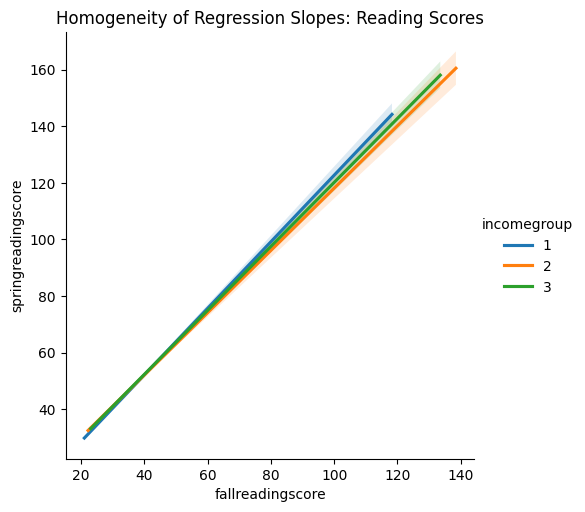

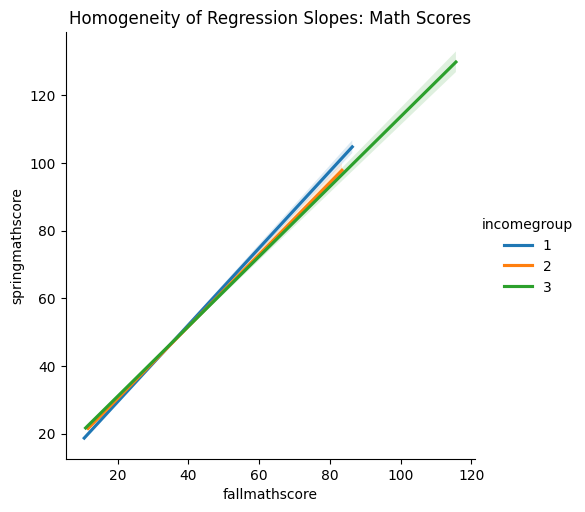

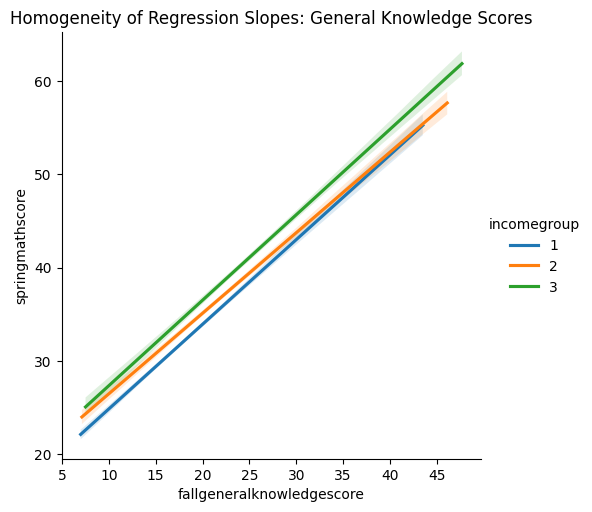

In [13]:
# 1. Linearity and Homogeneity of regression slopes
# Plot for reading scores
sns.lmplot(x='fallreadingscore', y='springreadingscore', hue='incomegroup', data=df,scatter=False)
plt.title('Homogeneity of Regression Slopes: Reading Scores')
plt.show()

# Plot for math scores
sns.lmplot(x='fallmathscore', y='springmathscore', hue='incomegroup', data=df,scatter=False)
plt.title('Homogeneity of Regression Slopes: Math Scores')
plt.show()

# Plot for Fall General knowledge scores
sns.lmplot(x='fallgeneralknowledgescore', y='springmathscore', hue='incomegroup', data=df, scatter = False)
plt.title('Homogeneity of Regression Slopes: General Knowledge Scores')
plt.show()

In [18]:
# 2. Homogeneity of variances
from scipy.stats import levene

def homogeneity_test(model, data, group_var):
    residuals = model.resid
    group_data = [residuals[data[group_var] == i] for i in data[group_var].unique()]
    stat, p_value = levene(*group_data)
    print(f"statistic={stat}, p-value={p_value}")


# Homogeneity test for Reading scores
print("Levene's test for Reading: ")
homogeneity_test(ancova_reading, df, 'incomegroup')

# Homogeneity test for Math scores
print("\nLevene's test for Math: ")
homogeneity_test(ancova_math, df, 'incomegroup')


Levene's test for Reading: 
statistic=26.59929207933737, p-value=2.976831456406797e-12

Levene's test for Math: 
statistic=29.452615198306116, p-value=1.7392687135876847e-13


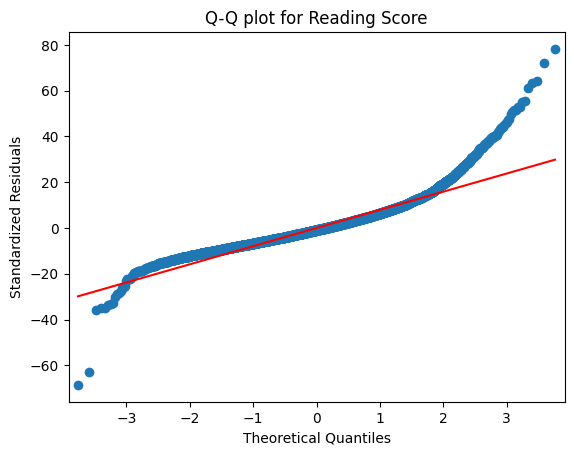

Shapiro Wilk test result:
   Test statistics  P-value
0          0.91186      0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
# 3. Normality of residuals - Reading
sm.qqplot(ancova_reading.resid, line='s')
plt.title("Q-Q plot for Reading Score")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

#Shapiro Wilk test
w,pvalue = stats.shapiro(ancova_reading.resid)
results_df = pd.DataFrame({'Test statistics':[w],'P-value':[pvalue]})
print('Shapiro Wilk test result:')
print(results_df)

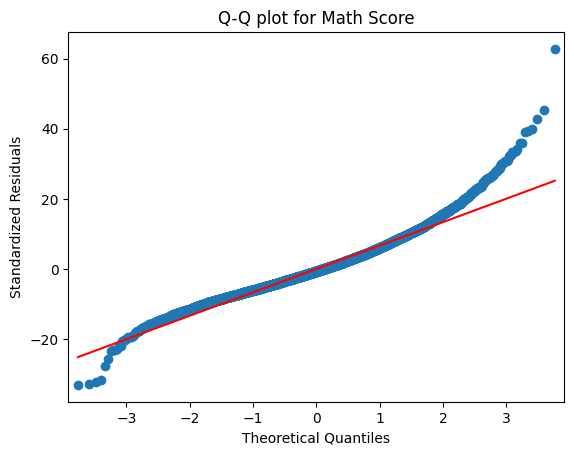

Shapiro Wilk test result:
   Test statistics  P-value
0         0.965369      0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [19]:
# 3. Normality of residuals - Math
sm.qqplot(ancova_math.resid, line='s')
plt.title("Q-Q plot for Math Score")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

#Shapiro Wilk test
w,pvalue = stats.shapiro(ancova_math.resid)
results_df = pd.DataFrame({'Test statistics':[w],'P-value':[pvalue]})
print('Shapiro Wilk test result:')
print(results_df)
